In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import ta

In [8]:
def download_data(ticker: str, start: str, end: str) -> pd.DataFrame:
    """Télécharge les données depuis Yahoo Finance."""
    data = yf.download(ticker, start=start, end=end)
    return data

def add_indicators(data: pd.DataFrame, ma_windows=[30]) -> pd.DataFrame:
    """Ajoute moyenne mobile(s) et rendement journalier sur le Close."""
    for window in ma_windows:
        data[f"MA{window}"] = data["Close"].rolling(window).mean()
    data["Returns"] = data["Close"].pct_change()
    return data


In [9]:
def add_ema(data: pd.DataFrame, ema_windows=[9], close_col="Close") -> pd.DataFrame:
    """
    Ajoute des colonnes EMA pour différentes fenêtres de temps.

    Args:
        data (pd.DataFrame): DataFrame contenant les prix.
        ema_windows (list): Liste des périodes pour calculer les EMA (default [9,21,50]).
        close_col (str): Nom de la colonne de clôture (default "Close").

    Returns:
        pd.DataFrame: DataFrame avec les EMA ajoutées.
    """
    for window in ema_windows:
        data[f"EMA{window}"] = data[close_col].ewm(span=window, adjust=False).mean()
    return data

In [10]:
def plot_data(data: pd.DataFrame, columns=["Close", "MA30"]):
    """Visualise les colonnes sélectionnées."""
    plt.figure(figsize=(12,6))
    for col in columns:
        if col in data.columns:
            plt.plot(data[col], label=col)
    plt.title("Évolution des prix normalisés")
    plt.xlabel("Date")
    plt.ylabel("Valeur normalisée")
    plt.legend()
    plt.show()

In [11]:
def add_indicators_ta(df: pd.DataFrame, close_col="Close", ma_windows=[30], ema_windows=[9,21,50]):
    """
    Ajoute MA, EMA et Rendements journaliers avec la librairie 'ta'.
    """
    # S'assurer que la colonne est 1D
    close = df[close_col]
    if isinstance(close, pd.DataFrame):
        close = close.iloc[:,0]  # prend la première colonne si c'est un DataFrame
    
    # Moyennes mobiles simples
    for window in ma_windows:
        df[f"MA{window}"] = ta.trend.SMAIndicator(close, window=window).sma_indicator()
    
    # EMA
    for window in ema_windows:
        df[f"EMA{window}"] = ta.trend.EMAIndicator(close, window=window).ema_indicator()
    
    # Rendement journalier
    df["Returns"] = close.pct_change()
    
    return df

In [12]:
ticker = "CL=F"
start_date = "1960-01-01"
end_date = "2025-01-01"

df = download_data(ticker, start_date, end_date)
# Exemple d'utilisation
df = add_indicators_ta(df, close_col="Close", ma_windows=[30], ema_windows=[9,21,50])


C:\Users\lulul\AppData\Local\Temp\ipykernel_16552\3767601350.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


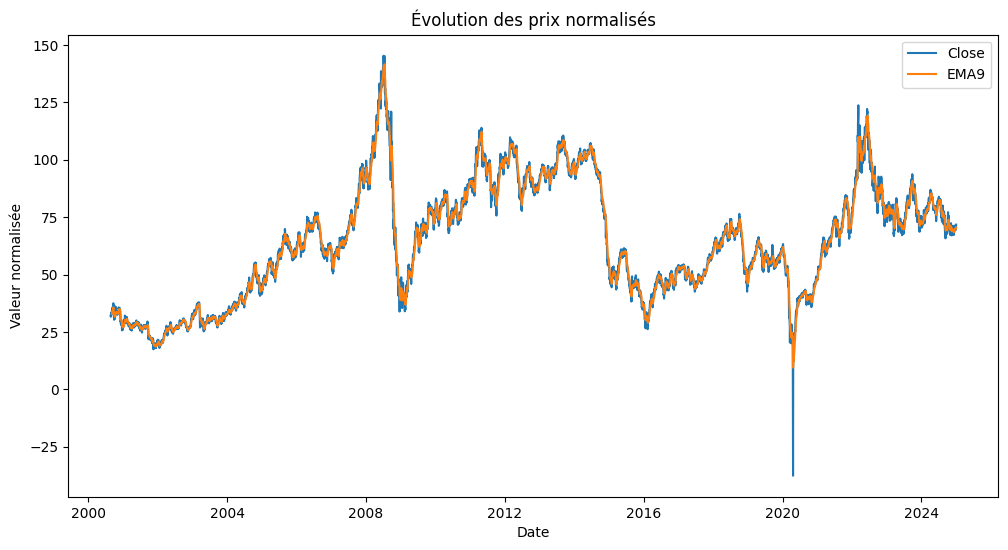

In [13]:
plot_data(df, columns=["Close","EMA9"])

In [14]:
# Supposons que df['EMA9'] existe déjà
df['EMA9_slope'] = df['EMA9'].diff()

print(df[['EMA9','EMA9_slope']].tail(10))


Price            EMA9 EMA9_slope
Ticker                          
Date                            
2024-12-17  69.824883   0.063780
2024-12-18  69.975907   0.151024
2024-12-19  69.962726  -0.013181
2024-12-20  69.862181  -0.100545
2024-12-23  69.737744  -0.124437
2024-12-24  69.810195   0.072451
2024-12-26  69.772157  -0.038038
2024-12-27  69.937725   0.165568
2024-12-30  70.148180   0.210455
2024-12-31  70.462544   0.314364


In [15]:
import numpy as np
df["arctan_EMA9"] = np.arctan(df["EMA9_slope"])
df["arctan_EMA9_deg"] = np.degrees(np.arctan(df["EMA9_slope"]))

In [16]:
df

Price,Close,High,Low,Open,Volume,MA30,EMA9,EMA21,EMA50,Returns,EMA9_slope,arctan_EMA9,arctan_EMA9_deg
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F,,,,,,,,
Date,,,,,,,,,,,,,
2000-08-23,32.049999,32.799999,31.950001,31.950001,79385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-24,31.629999,32.240002,31.400000,31.900000,72978,NaN,NaN,NaN,NaN,-0.013105,NaN,NaN,NaN
2000-08-25,32.049999,32.099998,31.320000,31.700001,44601,NaN,NaN,NaN,NaN,0.013279,NaN,NaN,NaN
2000-08-28,32.869999,32.919998,31.860001,32.040001,46770,NaN,NaN,NaN,NaN,0.025585,NaN,NaN,NaN
2000-08-29,32.720001,33.029999,32.560001,32.820000,49131,NaN,NaN,NaN,NaN,-0.004563,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,70.099998,70.430000,69.360001,69.559998,122602,69.206000,69.810195,69.631285,70.031977,0.012421,0.072451,0.072324,4.143888
2024-12-26,69.620003,70.750000,69.330002,70.199997,144877,69.256000,69.772157,69.630260,70.015821,-0.006847,-0.038038,-0.038020,-2.178392


In [17]:
df["diff_close_open"]=df["Close"]-df["Open"]

In [18]:
df["target"] = (df["diff_close_open"] > 0).astype(int)


In [19]:
df

Price,Close,High,Low,Open,Volume,MA30,EMA9,EMA21,EMA50,Returns,EMA9_slope,arctan_EMA9,arctan_EMA9_deg,diff_close_open,target
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F,,,,,,,,,,
Date,,,,,,,,,,,,,,,
2000-08-23,32.049999,32.799999,31.950001,31.950001,79385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099998,1
2000-08-24,31.629999,32.240002,31.400000,31.900000,72978,NaN,NaN,NaN,NaN,-0.013105,NaN,NaN,NaN,-0.270000,0
2000-08-25,32.049999,32.099998,31.320000,31.700001,44601,NaN,NaN,NaN,NaN,0.013279,NaN,NaN,NaN,0.349998,1
2000-08-28,32.869999,32.919998,31.860001,32.040001,46770,NaN,NaN,NaN,NaN,0.025585,NaN,NaN,NaN,0.829998,1
2000-08-29,32.720001,33.029999,32.560001,32.820000,49131,NaN,NaN,NaN,NaN,-0.004563,NaN,NaN,NaN,-0.099998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,70.099998,70.430000,69.360001,69.559998,122602,69.206000,69.810195,69.631285,70.031977,0.012421,0.072451,0.072324,4.143888,0.540001,1
2024-12-26,69.620003,70.750000,69.330002,70.199997,144877,69.256000,69.772157,69.630260,70.015821,-0.006847,-0.038038,-0.038020,-2.178392,-0.579994,0


In [20]:
df["diff_close_open_next"] = df["diff_close_open"].shift(-1)

# Création de la cible : 1 si positif, 0 si négatif ou nul
df["target"] = (df["diff_close_open_next"] > 0).astype(int)

In [21]:
df

Price,Close,High,Low,Open,Volume,MA30,EMA9,EMA21,EMA50,Returns,EMA9_slope,arctan_EMA9,arctan_EMA9_deg,diff_close_open,target,diff_close_open_next
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2000-08-23,32.049999,32.799999,31.950001,31.950001,79385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099998,0,-0.270000
2000-08-24,31.629999,32.240002,31.400000,31.900000,72978,NaN,NaN,NaN,NaN,-0.013105,NaN,NaN,NaN,-0.270000,1,0.349998
2000-08-25,32.049999,32.099998,31.320000,31.700001,44601,NaN,NaN,NaN,NaN,0.013279,NaN,NaN,NaN,0.349998,1,0.829998
2000-08-28,32.869999,32.919998,31.860001,32.040001,46770,NaN,NaN,NaN,NaN,0.025585,NaN,NaN,NaN,0.829998,0,-0.099998
2000-08-29,32.720001,33.029999,32.560001,32.820000,49131,NaN,NaN,NaN,NaN,-0.004563,NaN,NaN,NaN,-0.099998,1,0.650002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,70.099998,70.430000,69.360001,69.559998,122602,69.206000,69.810195,69.631285,70.031977,0.012421,0.072451,0.072324,4.143888,0.540001,0,-0.579994
2024-12-26,69.620003,70.750000,69.330002,70.199997,144877,69.256000,69.772157,69.630260,70.015821,-0.006847,-0.038038,-0.038020,-2.178392,-0.579994,1,0.919998


In [22]:
df.drop(columns=["diff_close_open_next"], inplace=True)


In [23]:
df

Price,Close,High,Low,Open,Volume,MA30,EMA9,EMA21,EMA50,Returns,EMA9_slope,arctan_EMA9,arctan_EMA9_deg,diff_close_open,target
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F,,,,,,,,,,
Date,,,,,,,,,,,,,,,
2000-08-23,32.049999,32.799999,31.950001,31.950001,79385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099998,0
2000-08-24,31.629999,32.240002,31.400000,31.900000,72978,NaN,NaN,NaN,NaN,-0.013105,NaN,NaN,NaN,-0.270000,1
2000-08-25,32.049999,32.099998,31.320000,31.700001,44601,NaN,NaN,NaN,NaN,0.013279,NaN,NaN,NaN,0.349998,1
2000-08-28,32.869999,32.919998,31.860001,32.040001,46770,NaN,NaN,NaN,NaN,0.025585,NaN,NaN,NaN,0.829998,0
2000-08-29,32.720001,33.029999,32.560001,32.820000,49131,NaN,NaN,NaN,NaN,-0.004563,NaN,NaN,NaN,-0.099998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,70.099998,70.430000,69.360001,69.559998,122602,69.206000,69.810195,69.631285,70.031977,0.012421,0.072451,0.072324,4.143888,0.540001,0
2024-12-26,69.620003,70.750000,69.330002,70.199997,144877,69.256000,69.772157,69.630260,70.015821,-0.006847,-0.038038,-0.038020,-2.178392,-0.579994,1


In [24]:
df.dropna(inplace=True)


In [25]:
df

Price,Close,High,Low,Open,Volume,MA30,EMA9,EMA21,EMA50,Returns,EMA9_slope,arctan_EMA9,arctan_EMA9_deg,diff_close_open,target
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F,,,,,,,,,,
Date,,,,,,,,,,,,,,,
2000-11-01,33.200001,33.750000,32.820000,33.150002,71542,32.698000,33.120170,33.140018,33.036520,0.015601,0.019958,0.019955,1.143347,0.049999,0
2000-11-02,32.540001,33.599998,32.200001,32.750000,66821,32.651000,33.004136,33.085471,33.017049,-0.019880,-0.116034,-0.115517,-6.618644,-0.209999,0
2000-11-03,32.599998,32.900002,32.320000,32.599998,54514,32.649333,32.923308,33.041337,33.000694,0.001844,-0.080827,-0.080652,-4.621027,0.000000,1
2000-11-06,32.860001,32.980000,32.099998,32.400002,63791,32.692333,32.910647,33.024852,32.995176,0.007976,-0.012662,-0.012661,-0.725414,0.459999,1
2000-11-07,33.400002,33.549999,32.980000,33.049999,58379,32.755667,33.008518,33.058956,33.011052,0.016433,0.097871,0.097560,5.589790,0.350002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,70.099998,70.430000,69.360001,69.559998,122602,69.206000,69.810195,69.631285,70.031977,0.012421,0.072451,0.072324,4.143888,0.540001,0
2024-12-26,69.620003,70.750000,69.330002,70.199997,144877,69.256000,69.772157,69.630260,70.015821,-0.006847,-0.038038,-0.038020,-2.178392,-0.579994,1


In [ ]:
df=df[]

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [43]:


# Supposons que ton DataFrame s'appelle df
features = ["arctan_EMA9_deg"]
X = df[features].values
y = df["target"].values

# Normalisation
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape pour LSTM : [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Conversion en tenseurs PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)



# Hyperparamètres
input_dim = X_train.shape[2]
hidden_dim = 100
model = LSTMModel(input_dim, hidden_dim)

# Optimiseur et perte
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

# Entraînement
epochs = 50
batch_size = 16
for epoch in range(epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        xb = X_train[i:i+batch_size]
        yb = y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
    
    # Affichage du progrès
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Évaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = (y_pred >= 0.5).float()
    accuracy = (y_pred_class == y_test).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")


KeyboardInterrupt: 

In [ ]:
y_pred

In [ ]:
y_pred.max()

In [ ]:
y_pred.min()